Path and name of the fits-file:  C:\Users\Usuario987\Dropbox\Matias\data\spectra\gagne1345_R.fits


Minimum and Maximum in flux:  0.17206137826524642    2.64599383389136


Would you like to see the header completely? y/n: n



Output of the header entries required for wavelength calculation:
Dimension, NAXIS:                         1
Number of values (abscissa), NAXIS1:      4096
Begin of wavelength-scale, CRVAL1:              6478.0060619404
Wavelength increment, CDELT1:     0.063155749232465


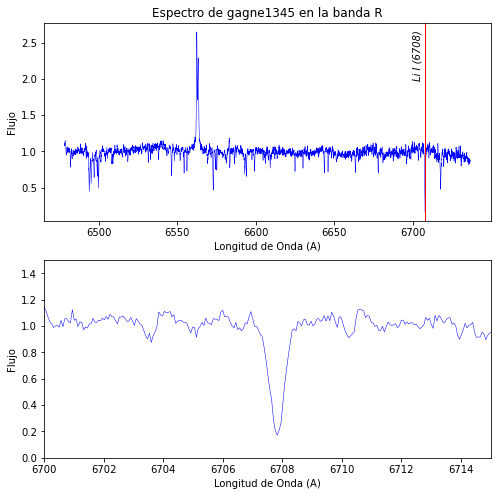

In [2]:
"""
fit_in_csv_and_dat.py

Conversion of a wavelength calibrated 1d spectrum in fits format into
Text format .csv (comma-separated) and .dat format (tab-separated).
With column headings 'WAVE' and 'FLUX'.

Release 20180815
@author: Lothar Schanne
"""

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.io import ascii

# Pfad und Name des 1d-fit-Spektrums
file = input('Path and name of the fits-file: ')

# Einlesen von Header und Daten
flux, header = fits.getdata(file, header = True)

print('Minimum and Maximum in flux: ', flux.min(), '  ', flux.max())

# Header-Check Spectrum
header_flag = input('Would you like to see the header completely? y/n:')
if header_flag == 'y':
    print('Header: ')
    print(header)

# Check for the necessary header entries
print('\nOutput of the header entries required for wavelength calculation:')
if 'NAXIS' in header:
    print('Dimension, NAXIS:                        ', header['NAXIS'])
else:
    print('That is no 1d-Spectrum !')
if 'NAXIS1' in header:
    nax = header['NAXIS1']
    print('Number of values (abscissa), NAXIS1:     ', nax)
else:
    print('NAXIS1 is missing in header !')
if 'CRVAL1' in header:
    crval = header['CRVAL1']
    print('Begin of wavelength-scale, CRVAL1:             ', crval)
else:
    print('CRVAL1 is missing in header !')
if 'CDELT1' in header:
    cdel = header['CDELT1']
    print('Wavelength increment, CDELT1:    ', cdel)
else:
    print('CDELT1 is missing in header !')

# Generation of a numpy array with the wavelengths of the spectrum
wave = np.ones(nax, dtype=float)
for i in range(nax):
    wave[i] = crval + (i - header['CRPIX1'] + 1) * cdel

# Writing the csv- and dat-files
ascii.write([wave, flux], file.strip('.fit') +'.csv', overwrite=True,
            names=['WAVELENGTH', 'FLUX'], format = 'csv')

target = file.split('\\')[-1]
name = target.split('_')[0]

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(wave, flux, color = 'blue', linewidth = 0.5)
plt.axvline(x=6708, color = 'red', linewidth=1)
plt.text(6700, 2, 'Li I (6708)', fontsize='medium', fontstyle='italic', rotation = 'vertical')
plt.title(f"Espectro de {name} en la banda R")
plt.xlabel("Longitud de Onda (A)")
plt.ylabel("Flujo")

plt.subplot(212)
plt.plot(wave, flux, color = 'blue', linewidth = 0.5)
plt.gca().set_xlim(6700, 6715)
plt.gca().set_ylim(0, 1.5)
plt.xlabel("Longitud de Onda (A)")
plt.ylabel("Flujo")

plt.savefig(f"./graphics/{name}_R.jpg")
plt.show()